In [2]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss


In [4]:

# Load the CSV file
df = pd.read_csv("cleaned_merged_data.csv")


In [8]:

# Data Preprocessing
df['Age'] = df['Age'].abs()
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')


In [10]:

# Feature Engineering
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.day_name()


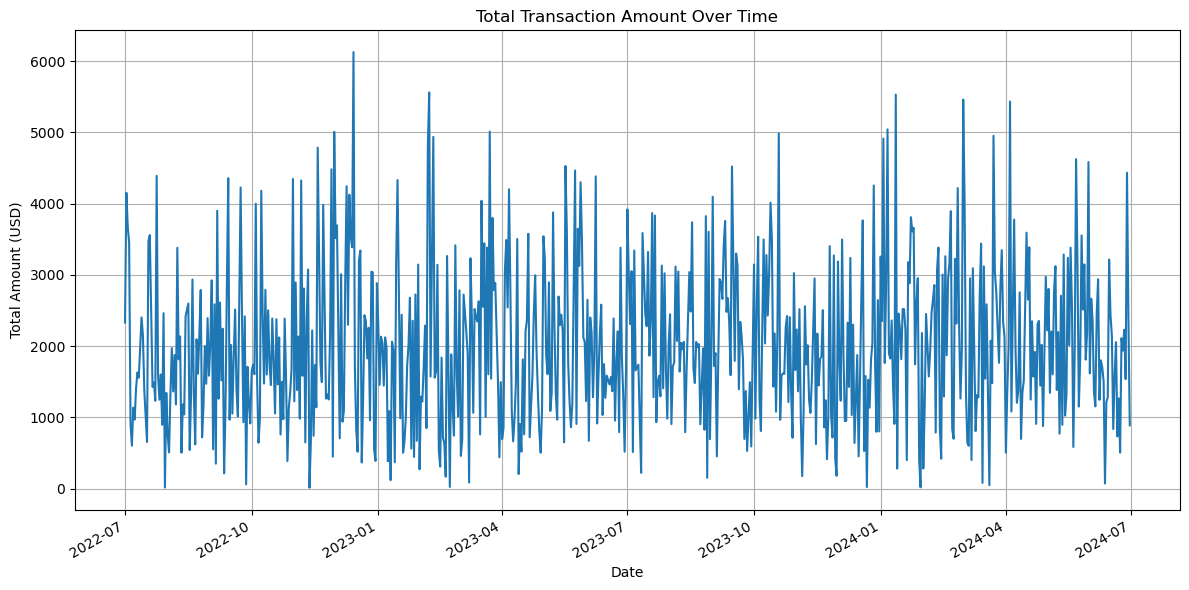

In [12]:

# EDA - Total Sales Trend Over Time
sales_trend = df.groupby('TransactionDate')['Amount'].sum()
plt.figure(figsize=(12, 6))
sales_trend.plot()
plt.title('Total Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount (USD)')
plt.grid(True)
plt.tight_layout()
plt.savefig("sales_trend.png")


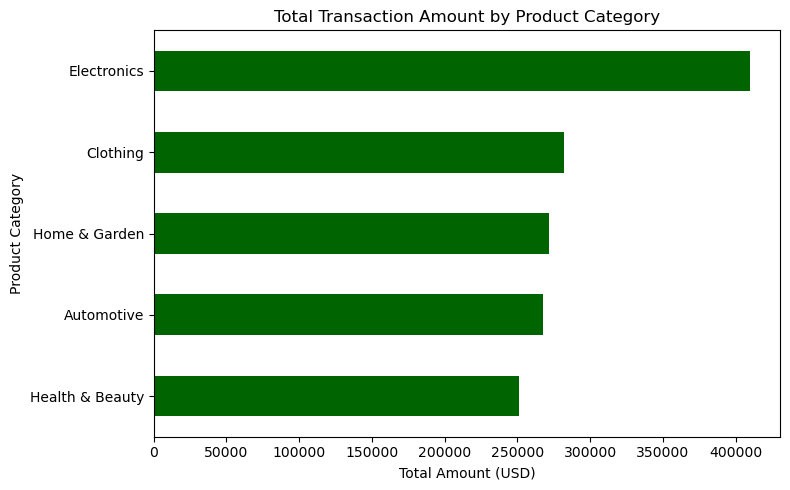

In [14]:

# Sales by Product Category
sales_by_product = df.groupby('ProductCategory')['Amount'].sum().sort_values()
plt.figure(figsize=(8, 5))
sales_by_product.plot(kind='barh', color='darkgreen')
plt.title('Total Transaction Amount by Product Category')
plt.xlabel('Total Amount (USD)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.savefig("sales_by_product.png")


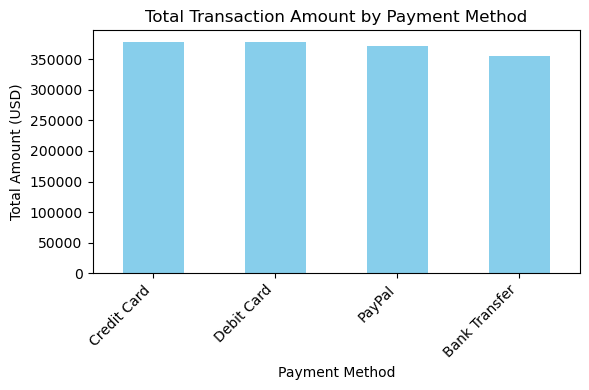

In [16]:

# Sales by Payment Method
sales_by_payment = df.groupby('PaymentMethod')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sales_by_payment.plot(kind='bar', color="skyblue")
plt.title("Total Transaction Amount by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Total Amount (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("sales_by_payment.png")


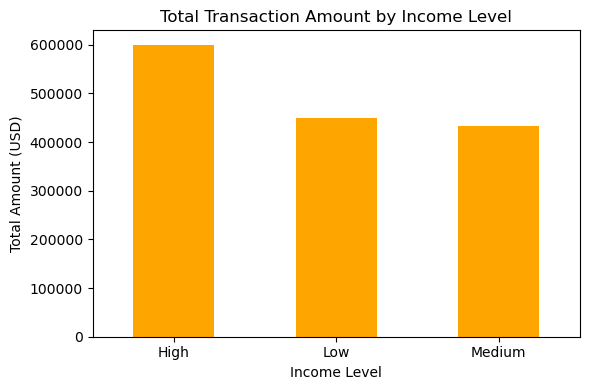

In [18]:

# Sales by Income Level
sales_by_income = df.groupby('IncomeLevel')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sales_by_income.plot(kind='bar', color="orange")
plt.title("Total Transaction Amount by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Total Amount (USD)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("sales_by_income.png")


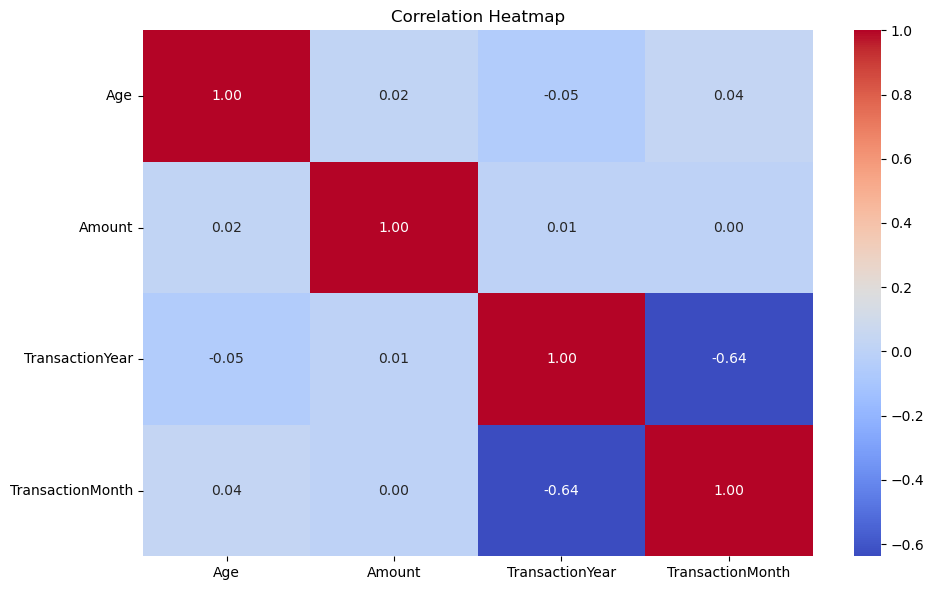

In [20]:

# Correlation Analysis
numeric_cols = ['Age', 'Amount', 'TransactionYear', 'TransactionMonth']
numeric_df = df[numeric_cols]
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("correlation_heatmap.png")


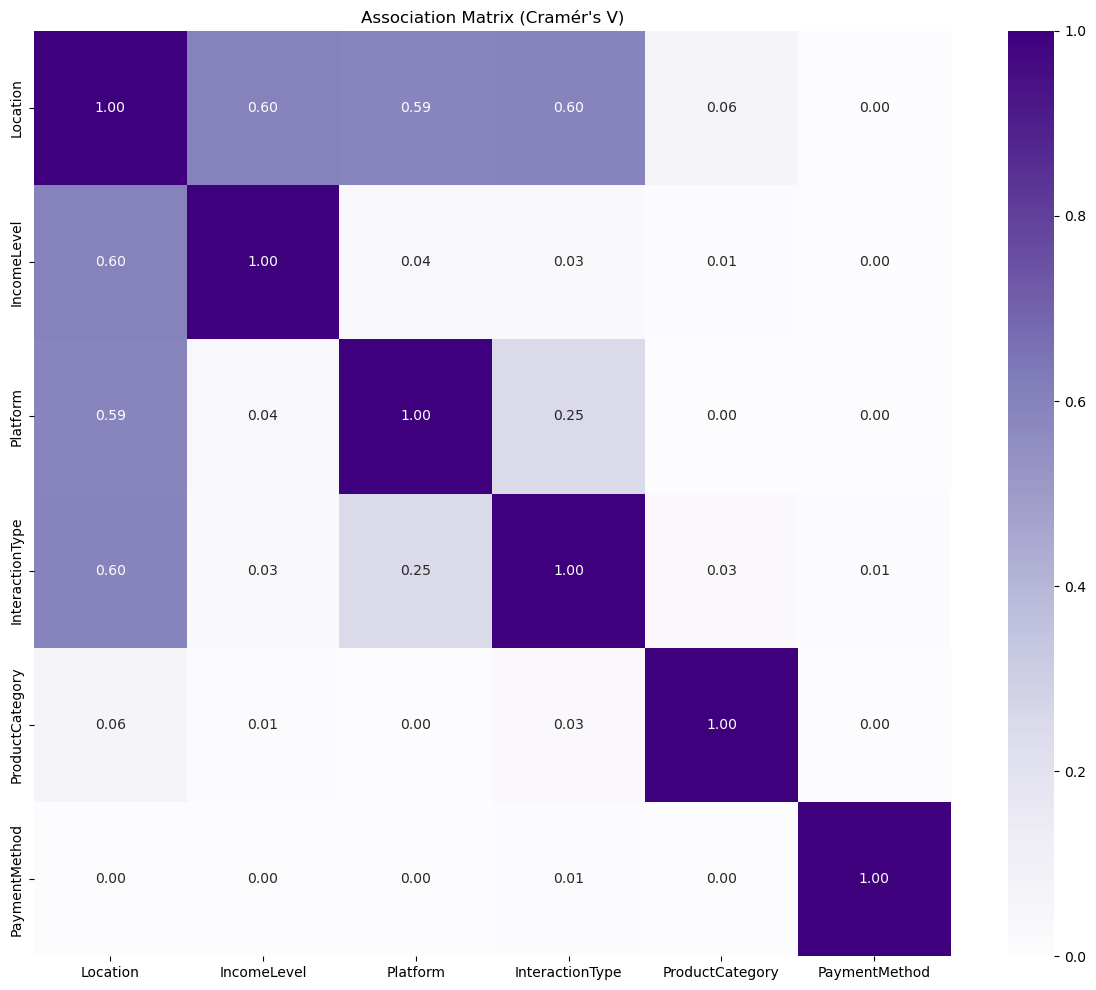

In [22]:
# Association Analysis (Cramér's V)
categorical_cols = ['Location', 'IncomeLevel', 'Platform', 'InteractionType', 'ProductCategory', 'PaymentMethod']
categorical_df = df[categorical_cols].fillna('Unknown')

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.empty:
        return 0
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    denom = min((kcorr - 1), (rcorr - 1))
    return np.sqrt(phi2corr / denom) if denom > 0 else 0

assoc_matrix = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))),
                            index=categorical_cols, columns=categorical_cols)
for col1 in categorical_cols:
    for col2 in categorical_cols:
        assoc_matrix.loc[col1, col2] = cramers_v(categorical_df[col1], categorical_df[col2])

plt.figure(figsize=(12, 10))
sns.heatmap(assoc_matrix, annot=True, cmap='Purples', fmt='.2f')
plt.title("Association Matrix (Cramér's V)")
plt.tight_layout()
plt.savefig("association_matrix.png")


/var/folders/yw/ghyqsycn5z34j1zd_gpjk9bw0000gn/T/ipykernel_3143/1173162517.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/yw/ghyqsycn5z34j1zd_gpjk9bw0000gn/T/ipykernel_3143/1173162517.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


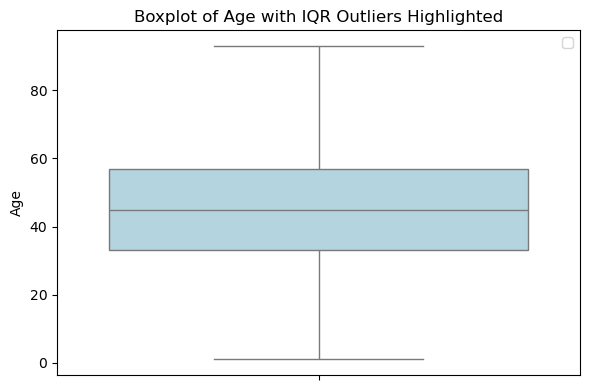

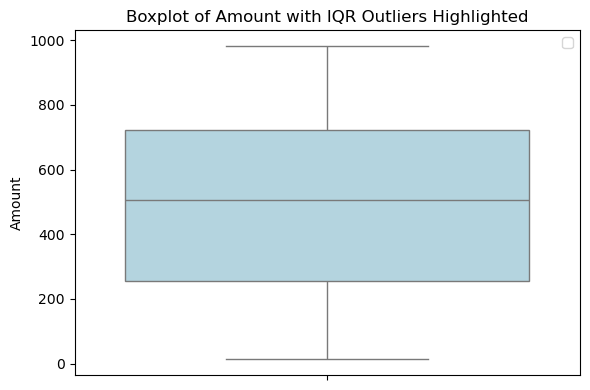

In [24]:
# Outlier Detection (IQR Method) with Highlighted Outliers
for col in ['Age', 'Amount']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='lightblue')
    sns.stripplot(y=outliers[col], color='red', size=5, jitter=True, label='Outliers')
    plt.title(f"Boxplot of {col} with IQR Outliers Highlighted")
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"boxplot_{col}_highlighted.png")

Full analysis completed and all plots saved.


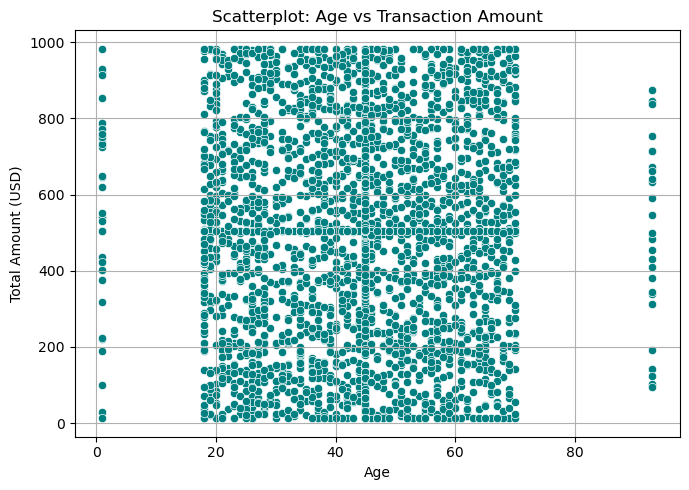

In [26]:
# Scatterplot: Age vs Transaction Amount
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Age', y='Amount', data=df, color='teal')
plt.title('Scatterplot: Age vs Transaction Amount')
plt.xlabel('Age')
plt.ylabel('Total Amount (USD)')
plt.grid(True)
plt.tight_layout()
plt.savefig("scatterplot_age_amount.png")

print("Full analysis completed and all plots saved.")